In [60]:
import xarray as xr
import os
import glob
expname='res1'
expdir=os.path.join('/lus/h2resw01/scratch/itas/ece4/', expname, 'output', 'nemo')

In [56]:
domain = xr.open_dataset(os.path.join(expdir, '..', '..', 'domain_cfg.nc'))
areacello = domain['e1t']*domain['e2t']
areacello

<xarray.DataArray (time_counter: 1, y: 331, x: 360)>
array([[[1.60000000e+01, 1.60000000e+01, 1.60000000e+01, ...,
         1.60000000e+01, 1.60000000e+01, 1.60000000e+01],
        [1.60000000e+01, 1.60000000e+01, 1.60000000e+01, ...,
         1.60000000e+01, 1.60000000e+01, 1.60000000e+01],
        [1.60000000e+01, 1.60000000e+01, 1.60000000e+01, ...,
         1.60000000e+01, 1.60000000e+01, 1.60000000e+01],
        ...,
        [6.48798304e+07, 1.80170991e+08, 2.79503247e+08, ...,
         2.79503247e+08, 1.80170991e+08, 6.48798304e+07],
        [4.96784478e+07, 1.68195300e+08, 2.68122014e+08, ...,
         2.68122014e+08, 1.68195300e+08, 4.96784478e+07],
        [3.18035791e+07, 1.55003643e+08, 2.55830703e+08, ...,
         2.55830703e+08, 1.55003643e+08, 3.18035791e+07]]])
Coordinates:
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x

In [80]:
filelist = glob.glob(os.path.join(expdir, 'res1_oce_1m_T_*.nc'))
gridT = xr.open_mfdataset(filelist[1:])
gridT = gridT.rename_dims({'x_grid_T': 'x', 'y_grid_T': 'y', 'time_counter': 'time'})
gridT = gridT.rename({'time_counter': 'time'})
gridT

/etc/ecmwf/ssd/ssd1/tmpdirs/ccpd.3384705.20231012_074706.793/ipykernel_1236066/294242084.py:4: UserWarning: rename 'time_counter' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  gridT = gridT.rename({'time_counter': 'time'})


<xarray.Dataset>
Dimensions:               (y: 331, x: 360, deptht: 75, time: 60,
                           axis_nbounds: 2, y_grid_T_inner: 331,
                           x_grid_T_inner: 360)
Coordinates:
    nav_lat_grid_T        (y, x) float32 dask.array<chunksize=(331, 360), meta=np.ndarray>
    nav_lon_grid_T        (y, x) float32 dask.array<chunksize=(331, 360), meta=np.ndarray>
  * deptht                (deptht) float32 0.5 1.55 ... 5.698e+03 5.902e+03
    time_centered         (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 1990-01-16T12:00:00 ... 1994-...
Dimensions without coordinates: y, x, axis_nbounds, y_grid_T_inner,
                                x_grid_T_inner
Data variables: (12/25)
    deptht_bounds         (time, deptht, axis_nbounds) float32 dask.array<chunksize=(12, 75, 2), meta=np.ndarray>
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    e3t                   (time, deptht, y, x) float32 dask.array<chunksize=(1, 75, 331, 360), meta=np.ndarray>
    thetao                (time, deptht, y, x) float32 dask.array<chunksize=(1, 75, 331, 360), meta=np.ndarray>
    so                    (time, deptht, y, x) float32 dask.array<chunksize=(1, 75, 331, 360), meta=np.ndarray>
    ...                    ...
    qt_oce                (time, y, x) float32 dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    sfx                   (time, y, x) float32 dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    taum                  (time, y, x) float32 dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    windsp                (time, y, x) float32 dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    precip                (time, y, x) float32 dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    snowpre               (time, y, x) float32 dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
Attributes:
    name:         output/nemo/res1_oce_1m_T
    description:  ECE4/NEMO T grid variables
    title:        ECE4/NEMO T grid variables
    Conventions:  CF-1.6
    timeStamp:    2023-Oct-05 15:45:43 GMT
    uuid:         379edbf8-c29b-4a2a-8027-553581697456

In [77]:
mask = xr.where(gridT.tos.isel(time=0)>0, 1, float('NaN'))

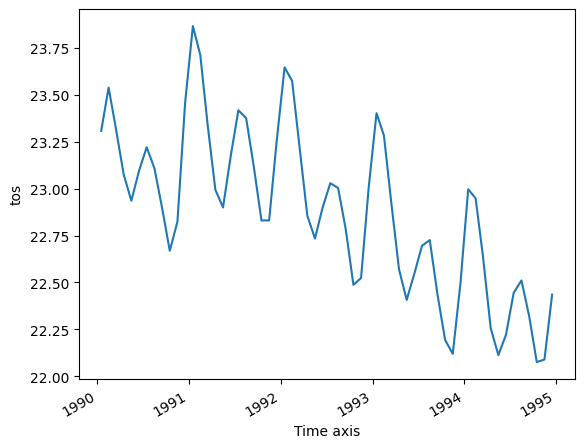

In [81]:
out = gridT.tos.mean(dim=['y', 'x']).plot()

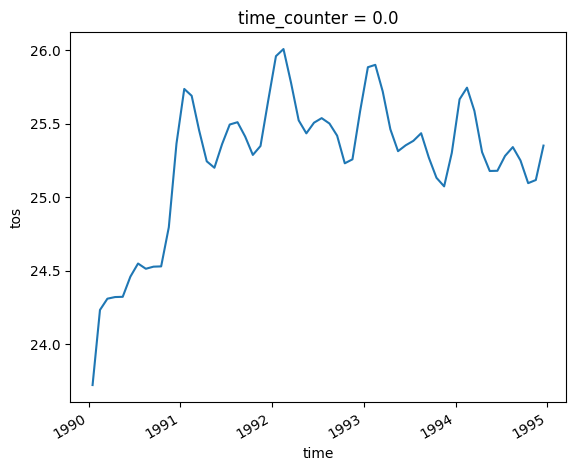

In [82]:
out = gridT.tos.weighted(areacello).mean(dim=['y', 'x']).plot()